In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../datasets/gpt_data/definitive/train.csv')

In [3]:
train = train.drop(['_c0', 'tconst'], axis=1)

In [4]:
train.iloc[0:2,:18] #until 18 we have everything a part from genres

,primaryTitle,startYear,runtimeMinutes,numVotes,label,plot,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,2020-2023
0,the doll,1919,66,-0.227541,True,the doll is a 1919 silent film directed by e...,0,1,0,0,0,0,0,0,0,0,0,0
1,way down east,1920,145,-0.195619,True,the way down east is a 1920 silent film dire...,1,1,0,0,0,0,0,0,0,0,0,0


In [5]:
#NEW TRAIN TEST SPLIT (same as Bert model)
train = train.sample(frac=1, random_state=420).reset_index(drop=True)

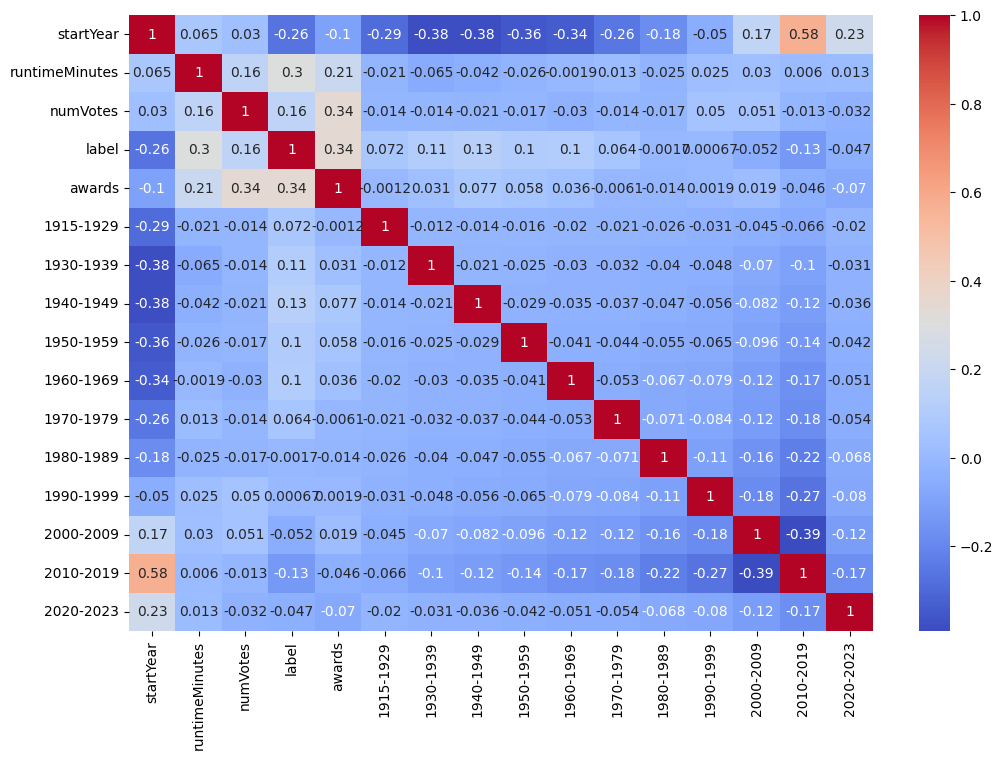

In [7]:
import seaborn as sns
corr_matrix = train.iloc[:,:18].corr()

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [8]:
#doing correlation matrix of only GENRES(indeces 18,19,20,...) and LABEL(index 4)
corr_matrix = train.iloc[:,[4] + list(range(18, train.shape[1]))].corr()

In [9]:
abs(corr_matrix['label']).sort_values(ascending=False)[1:8]

drama        0.183924
horror       0.097169
biography    0.084171
noir         0.070080
comedy       0.068782
unknown      0.054879
sci-fi       0.053214
Name: label, dtype: float64

In [10]:
genres_to_keep = abs(corr_matrix['label']).sort_values(ascending=False)[1:8].index.values
genres_to_keep

array(['drama', 'horror', 'biography', 'noir', 'comedy', 'unknown',
       'sci-fi'], dtype=object)

In [11]:
all_genres = train.iloc[:, 18:].columns.values

In [12]:
genres_to_remove = set(all_genres) - set(genres_to_keep)

In [13]:
train = train.drop(list(genres_to_remove), axis=1)
train.iloc[0:2,:]

,primaryTitle,startYear,runtimeMinutes,numVotes,label,plot,awards,1915-1929,1930-1939,1940-1949,...,2000-2009,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy
0,corruption,1968,91,-0.233048,False,"in 1968, a small town in the midwest is rock...",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,hawaizaada,2015,148,-0.227816,False,hawaizaada is a 2015 indian biographical dra...,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [14]:
# drop titles and plot
train = train.drop(['primaryTitle', 'startYear', 'plot'], axis=1)

In [15]:
train.head()

,runtimeMinutes,numVotes,label,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,...,2000-2009,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy
0,91,-0.233048,False,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,148,-0.227816,False,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,92,-0.077974,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,112,-0.176621,True,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,118,-0.233130,True,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [16]:
train['label'].dtype

dtype('bool')

In [17]:
train['label'] = train['label'].astype(int)

In [18]:
train.head()

,runtimeMinutes,numVotes,label,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,...,2000-2009,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy
0,91,-0.233048,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,148,-0.227816,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,92,-0.077974,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,112,-0.176621,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,118,-0.233130,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Add Bert feature train test split

In [19]:
bert_variable = pd.read_csv('../datasets/bert_outputs/bert_variable_train.csv', header=None)
bert_variable.shape

(7959, 1)

In [20]:
train['bert_variable'] = bert_variable

In [21]:
train.head()

,runtimeMinutes,numVotes,label,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,...,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy,bert_variable
0,91,-0.233048,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.767633
1,148,-0.227816,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.242260
2,92,-0.077974,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.011518
3,112,-0.176621,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.980346
4,118,-0.233130,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.985093


### final correlation matrix

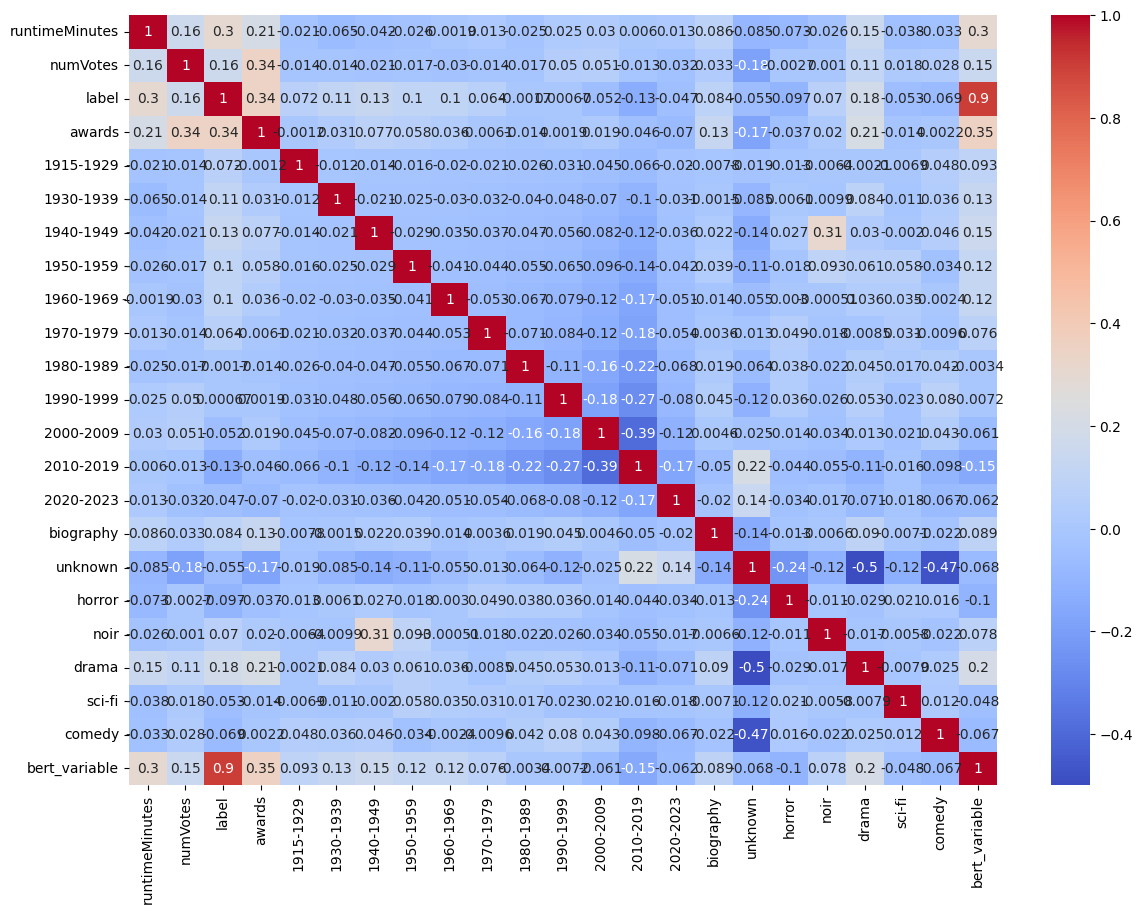

In [22]:
import seaborn as sns
corr_matrix = train.iloc[:].corr() #trying train_size

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

## Modelling

In [25]:
#OLD TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
y = train["label"]
X = train.drop(["label"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [24]:
#NEW TRAIN TEST SPLIT
train_size = int(0.8 * len(train))

y = train["label"]
X = train.drop(["label"],axis=1)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [26]:
X_train

,runtimeMinutes,numVotes,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,...,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy,bert_variable
5853,92,-0.220382,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.069677
1279,106,-0.235773,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.036141
7104,90,0.209089,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.021479
7794,114,-0.235773,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.108907
1555,145,-0.173922,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.938933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,93,-0.218289,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.012722
5390,99,-0.228422,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.011420
860,129,-0.235773,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.036149
7603,84,-0.230037,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.069333


## Random Forest

In [27]:
train.head()

,runtimeMinutes,numVotes,label,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,...,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy,bert_variable
0,91,-0.233048,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.767633
1,148,-0.227816,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.242260
2,92,-0.077974,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.011518
3,112,-0.176621,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.980346
4,118,-0.233130,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.985093


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of random forest:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

Accuracy of random forest: 0.9395414572864321
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3174
           1       0.94      0.94      0.94      3194

    accuracy                           0.94      6368
   macro avg       0.94      0.94      0.94      6368
weighted avg       0.94      0.94      0.94      6368



In [29]:
confusion_matrix(y_test, y_pred_rf)

array([[2971,  203],
       [ 182, 3012]])

In [30]:
X.shape

(7959, 22)

## LightGBM

In [32]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,cross_val_score,RepeatedStratifiedKFold,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [33]:
# Create lgbm object
clf = lgb.LGBMClassifier()

# Train lgbm
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# y_pred = (clf.predict_proba(X_test)[:,1] >= 0.89).astype(bool) # set threshold as 0.882 (random number)

confusion_matrix(y_test, y_pred)

array([[2973,  201],
       [ 204, 2990]])

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.classification_report(y_test, y_pred))

Accuracy:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3174
           1       0.94      0.94      0.94      3194

    accuracy                           0.94      6368
   macro avg       0.94      0.94      0.94      6368
weighted avg       0.94      0.94      0.94      6368



### Submit

In [35]:
validation = pd.read_csv('../datasets/gpt_data/definitive/validation.csv')
test = pd.read_csv('../datasets/gpt_data/definitive/test.csv')

In [36]:
validation.shape, test.shape

((955, 67), (1086, 79))

In [37]:
validation.iloc[:2,:]

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,numVotes,plot,awards,1915-1929,1930-1939,...,nadeem,war,historical,mockumentary,romance,martial arts,thriller,epic,sci-fi,comedy
0,0,tt0003740,cabiria,1914,148,-0.238496,cabiria is a 1914 italian silent film direct...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,tt0008663,a man there was,1917,65,-0.256873,a man there was is a 1917 silent film direct...,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#drop not useful genres
all_genres_val = validation.iloc[:, 19:].columns.values #val 
genres_to_remove_val = set(all_genres_val) - set(genres_to_keep) #val
validation = validation.drop(list(genres_to_remove_val), axis=1)

all_genres_test = test.iloc[:, 19:].columns.values #test
genres_to_remove_test = set(all_genres_test) - set(genres_to_keep) #test
test = test.drop(list(genres_to_remove_test), axis=1)

#drop also other columns
validation = validation.drop(['Unnamed: 0', 'tconst','primaryTitle','startYear', 'plot'], axis=1)
test = test.drop(['Unnamed: 0', 'tconst','primaryTitle','startYear', 'plot'], axis=1)

validation.head()

,runtimeMinutes,numVotes,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,...,2000-2009,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy
0,148,-0.238496,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,65,-0.256873,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,166,-0.259097,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,74,-0.045994,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,143,-0.212464,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
#add bert variables
bert_variable_validation = pd.read_csv('../datasets/bert_outputs/bert_variable_validation.csv', header=None)
bert_variable_test = pd.read_csv('../datasets/bert_outputs/bert_variable_test.csv', header=None)

validation['bert_variable'] = bert_variable_validation
test['bert_variable'] = bert_variable_test

validation.head()

,runtimeMinutes,numVotes,awards,1915-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,...,2010-2019,2020-2023,biography,unknown,horror,noir,drama,sci-fi,comedy,bert_variable
0,148,-0.238496,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.954166
1,65,-0.256873,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.979974
2,166,-0.259097,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.983179
3,74,-0.045994,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.980733
4,143,-0.212464,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.912902


In [41]:
#make predictions
validate_results = clf.predict(validation)
test_results = clf.predict(test)

In [42]:
validate_results[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
pd.DataFrame(validate_results)[0].map({1:"True", 0:"False"}).to_csv("../datasets/lightGBM_outputs/validation_predictions.csv",
                                                                    index=False, header=False)
pd.DataFrame(test_results)[0].map({1: "True", 0: "False"}).to_csv("../datasets/lightGBM_outputs/test_predictions.csv",
                                                                  index=False, header=False)